In [7]:
# -*- encoding:utf-8 -*-

#GERAR MC GRAFICA

from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [8]:
#Carregando os datasets
iris = datasets.load_iris()

In [9]:
#Criando o cluster
cluster = kmedoids(iris.data[:, 0:2],[3,12,20])
cluster.get_medoids()
cluster.process()

In [10]:
#Gerando as visualizações, nesse caso ele gera listas com os dados dos
#clusters classificados
previsoes = cluster.get_clusters()
#Pegando os medoids (centro dos clusters)
medoids = cluster.get_medoids()

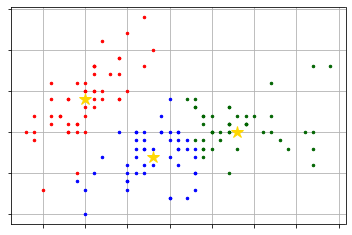

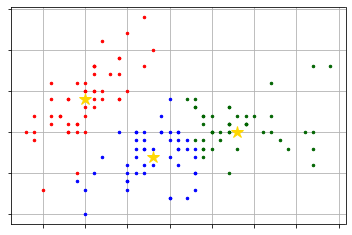

In [15]:
#Visualizando os clusters e mostrando os medoids computados
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:,0:2])
v.append_cluster(medoids, data = iris.data[:,0:2], marker = '*', markersize = 12)
v.show()

In [17]:
#Comparando os acertos (ajustando o arquivo de acordo com os dados capturados)
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
    for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)

In [18]:
#Visualizando os resultados
resultados = confusion_matrix(lista_real, lista_previsoes)

In [19]:
resultados

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 1, 14, 35]])